<a href="https://colab.research.google.com/github/ChiomaO15/ChiomaO15/blob/main/PHYLOGENETIC_TREE_CONSTRUCTION_USING_IQTREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code constructs a phylogenetic tree using alignment fasta file generated from Roary.

In [ ]:
# Download the latest IQ‑TREE 3.0.1 Linux binary
!wget https://github.com/iqtree/iqtree3/releases/latest/download/iqtree-3.0.1-Linux.tar.gz
!tar -zxvf iqtree-3.0.1-Linux.tar.gz
!chmod +x iqtree-3.0.1-Linux/bin/iqtree
!ln -s "$(pwd)/iqtree-3.0.1-Linux/bin/iqtree" /usr/local/bin/iqtree

# Verify installation
!iqtree -h | head -n 5


--2025-08-21 10:31:17--  https://github.com/iqtree/iqtree3/releases/latest/download/iqtree-3.0.1-Linux.tar.gz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/iqtree/iqtree3/releases/download/v3.0.1/iqtree-3.0.1-Linux.tar.gz [following]
--2025-08-21 10:31:18--  https://github.com/iqtree/iqtree3/releases/download/v3.0.1/iqtree-3.0.1-Linux.tar.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/941852084/61ee862a-009b-4344-93cc-70408600ceb9?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-08-21T11%3A30%3A19Z&rscd=attachment%3B+filename%3Diqtree-3.0.1-Linux.tar.gz&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-08-21T10%3A29%3A46Z&ske=2

In [ ]:
# Make the real binary executable
!chmod +x iqtree-3.0.1-Linux/bin/iqtree3_intel

# Symlink it as a command
!ln -sf "$(pwd)/iqtree-3.0.1-Linux/bin/iqtree3_intel" /usr/local/bin/iqtree

# Confirm it's working
!iqtree -h | head -n 10


IQ-TREE version 3.0.1 for Linux x86 64-bit built May  5 2025
Developed by Bui Quang Minh, Thomas Wong, Nhan Ly-Trong, Huaiyan Ren
Contributed by Lam-Tung Nguyen, Dominik Schrempf, Chris Bielow,
Olga Chernomor, Michael Woodhams, Diep Thi Hoang, Heiko Schmidt

Usage: iqtree [-s ALIGNMENT] [-p PARTITION] [-m MODEL] [-t TREE] ...

GENERAL OPTIONS:
  -h, --help           Print (more) help usages
  -s FILE[,...,FILE]   PHYLIP/FASTA/NEXUS/CLUSTAL/MSF alignment file(s)


In [ ]:
# Install Biopython
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 8.6 MB/s eta 0:00:00


In [ ]:
import subprocess
from Bio import Phylo

alignment_file = "/content/Core Gene Alignment.fasta"

iqtree_cmd = [
    "iqtree",
    "-s", alignment_file,
    "-m", "MFP",
    "-bb", "1000",
    "-nt", "AUTO"
]

print("Running IQ-TREE...")
try:
    subprocess.run(iqtree_cmd, check=True)
    print("IQ-TREE finished successfully.")
except subprocess.CalledProcessError as e:
    print(f"Error running IQ-TREE: {e}")

tree_file = alignment_file + ".treefile"
try:
    tree = Phylo.read(tree_file, "newick")
    Phylo.draw_ascii(tree)
except Exception as e:
    print(f"Could not display tree: {e}")


Running IQ-TREE...
IQ-TREE finished successfully.
 , Bacillus_amyloliquefaciens_HN11
 |
 |                                     , Bacillus_coagulans_HM-08
 |           __________________________|
 |     _____|                          | Bacillus_coagulans_HOM5301
 |    |     |
 |____|     |______ Bacillus_glycinifermentans_SRCMIO3574
_|    |
 |    |     , Bacillus_subtilis_G2BTE3179
 |    |_____|
 |          | Bacillus_subtilis_Z-294
 |
 | Bacillus_velezensis_JSRB-08
 |
 | Bacillus_velezensis_YJO-1



In [ ]:
!apt-get update -qq
!apt-get install -y r-base

!pip install rpy2


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 74 not upgraded.


In [ ]:
%load_ext rpy2.ipython


Fusing the generated phylogentic tree with Antismash BGC analysis result which was computed on a word document and panda was used to form a dataframe.

In [ ]:
import pandas as pd
from io import StringIO

# My raw table as text
data = """Organism    Terpene Pks-Like    NRPS    TransAT-Pks,T3PKS    Lanthipeptide_class_ii/iii    Ripp-like    LAP,RRE-containing    Betalactone    Sanctipeptide    Thiopeptide    other   NI-siderophore
Bacillus velezensis JSRB-08   1   1   1   1   1   1   0   0   0   0   1   0
Bacillus amyloliquefaciens HN11   1   1   1   1   0   1   1   0   0   0   1   0
Bacillus coagulans HM-08  0   0   0   1   0   1   0   1   0   0   1   0
Bacillus glycinifermentans SRCMIO3574   1   0   1   1   0   0   0   0   1   1   0   1
Bacillus subtilis G2BTE3179  1   1   1   1   1   0   1   1   1   0   0   0
Bacillus subtilis Z-294  1   1   1   1   0   1   0   1   1   0   1   0
Bacillus velezensis YJO-1    1   1   1   1   0   1   0   0   0   0   1   0
Bacillus coagulans HOM5301   0   0   0   1   0   1   1   1   0   1   0   0
"""

# Read into pandas
df = pd.read_csv(StringIO(data), sep="\t")

# Display DataFrame
print(df)

# save to CSV for later use
df.to_csv("bgc_table.csv", index=False)


  Organism    Terpene Pks-Like    NRPS    TransAT-Pks,T3PKS    Lanthipeptide_class_ii/iii    Ripp-like    LAP,RRE-containing    Betalactone    Sanctipeptide    Thiopeptide    other   NI-siderophore
0  Bacillus velezensis JSRB-08   1   1   1   1   ...                                                                                                                                                 
1  Bacillus amyloliquefaciens HN11   1   1   1   ...                                                                                                                                                 
2  Bacillus coagulans HM-08  0   0   0   1   0   ...                                                                                                                                                 
3  Bacillus glycinifermentans SRCMIO3574   1   0 ...                                                                                                                                                 
4  Bacillu

In [ ]:
# Install R essentials and ggtree
!apt-get install -y r-base
!R -e "install.packages(c('tidyverse', 'ape', 'treeio'), repos='http://cran.us.r-project.org')"
!R -e "if (!requireNamespace('BiocManager', quietly = TRUE)) install.packages('BiocManager')"
!R -e "BiocManager::install(c('ggtree'))"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 74 not upgraded.

R version 4.5.1 (2025-06-13) -- "Great Square Root"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages(c('tidyverse', 'ape', 'treeio'), repos='http://cran.us.r-project.org')
Installing

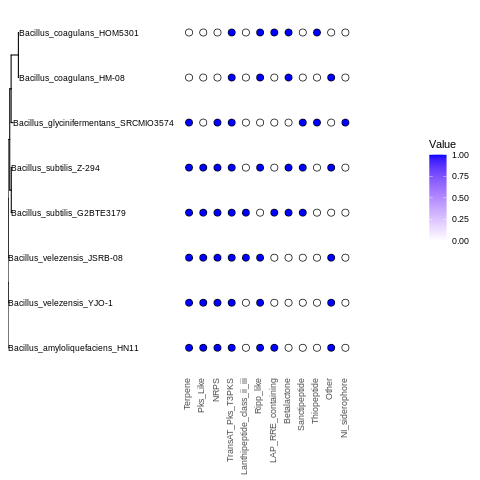

In [13]:
%%R
library(tidyverse)
library(ape)
library(ggtree)

# Load tree
tree <- read.tree("/content/Core Gene Alignment.fasta.treefile")

# Load BGC table
bgc <- read.csv("/content/bgc_data.csv", check.names = FALSE)
bgc$Organism <- gsub(" ", "_", bgc$Organism)
rownames(bgc) <- bgc$Organism

# Convert to numeric
bgc_matrix <- bgc[, -1] %>% mutate(across(everything(), as.numeric))
bgc_matrix <- bgc_matrix[tree$tip.label, ]

# Plot tree
p <- ggtree(tree) + geom_tiplab(size = 3)

# Convert matrix to long format for plotting
bgc_long <- bgc_matrix %>%
  rownames_to_column("Organism") %>%
  pivot_longer(-Organism, names_to = "BGC", values_to = "Value")

# Merge with tree coordinates
p_data <- p$data %>% filter(isTip)
bgc_long <- left_join(bgc_long, p_data[, c("label", "y")],
                      by = c("Organism" = "label"))

# Map each BGC to an x-position with a much bigger offset from the tree
bgc_long <- bgc_long %>%
  mutate(BGC = factor(BGC, levels = unique(BGC)),
         x = as.numeric(BGC) + max(p$data$x) + 11)

# Plot points instead of tiles
p + geom_point(data = bgc_long,
               aes(x = x, y = y, fill = Value),
               shape = 21, size = 3, color = "black") +
  scale_fill_gradient(low = "white", high = "blue", na.value = "white") +
  scale_x_continuous(expand = expansion(mult = c(0, 0.2)),
                     breaks = unique(bgc_long$x),
                     labels = levels(bgc_long$BGC)) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.2, hjust=1))




In addition: There were 18 warnings (use warnings() to see them)


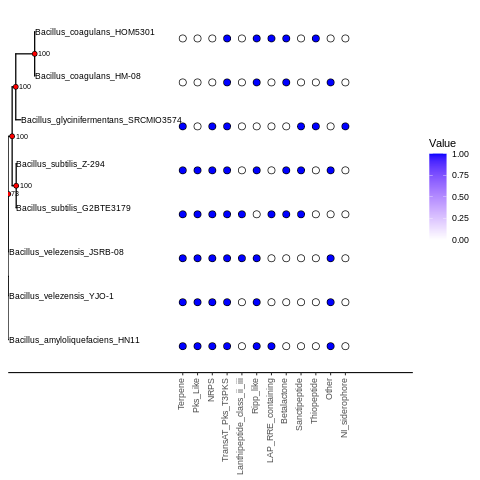

In [14]:
%%R
library(tidyverse)
library(ape)
library(ggtree)

# ===== Load tree =====
tree <- read.tree("/content/Core Gene Alignment.fasta.treefile")

# ===== Load BGC table =====
bgc <- read.csv("/content/bgc_data.csv", check.names = FALSE)
bgc$Organism <- gsub(" ", "_", bgc$Organism)
rownames(bgc) <- bgc$Organism

# Convert BGC data to numeric (and order to tree tips)
bgc_matrix <- bgc[, -1] %>% mutate(across(everything(), as.numeric))
bgc_matrix <- bgc_matrix[tree$tip.label, ]

# ===== Bootstrap safety & cutoff =====
boot_cutoff <- 70
if (!is.null(tree$node.label)) {
  tree$node.label <- as.numeric(tree$node.label)
} else {
  tree$node.label <- rep(NA, tree$Nnode)
}

# ===== Base tree plot (stretch branches) =====
p <- ggtree(tree, size = 0.6)
p$data$x <- p$data$x * 2.5

# Add tip labels + bootstrap numeric labels + colored bootstrap dots
p <- p +
  geom_tiplab(size = 3) +
  geom_text2(aes(subset = !isTip & !is.na(as.numeric(label)),
                 label = round(as.numeric(label), 1)),
             hjust = -0.3, size = 2.5) +
  # high support dots
  geom_point2(aes(subset = !isTip & !is.na(as.numeric(label)) & as.numeric(label) >= boot_cutoff),
              shape = 21, fill = "red", size = 2, color = "black") +
  # low support dots
  geom_point2(aes(subset = !isTip & !is.na(as.numeric(label)) & as.numeric(label) < boot_cutoff),
              shape = 21, fill = "grey80", size = 2, color = "black") +
  theme_tree2()

# ===== Prepare BGC data (long) =====
bgc_long <- bgc_matrix %>%
  rownames_to_column("Organism") %>%
  pivot_longer(-Organism, names_to = "BGC", values_to = "Value")

# Merge tip y-coordinates
p_data <- p$data %>% filter(isTip)
bgc_long <- left_join(bgc_long, p_data[, c("label", "y")],
                      by = c("Organism" = "label"))

# ===== Shift heatmap well to the right to avoid overlap =====
bgc_long <- bgc_long %>%
  mutate(BGC = factor(BGC, levels = unique(BGC)),
         x = as.numeric(BGC) + max(p$data$x, na.rm = TRUE) + 9,
         y = y - 0.15)

# ===== Build final plot
final_plot <- p +
  geom_point(data = bgc_long, inherit.aes = FALSE,
             aes(x = x, y = y, fill = Value),
             shape = 21, size = 3, color = "black") +
  scale_fill_gradient(low = "white", high = "blue", na.value = "white") +
  scale_x_continuous(expand = expansion(mult = c(0, 0.2)),
                     breaks = unique(bgc_long$x),
                     labels = levels(bgc_long$BGC)) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.2, hjust = 1),
        legend.position = "right")

# ===== Display the plot in this R cell =====
print(final_plot)

# ===== Save high-resolution PNG + vector PDF (sharp when zoomed) =====
ggsave("/content/BGC_tree_with_bootstrap.png", plot = final_plot,
       width = 16, height = 10, units = "in", dpi = 600, bg = "white")
ggsave("/content/BGC_tree_with_bootstrap.pdf", plot = final_plot,
       width = 16, height = 10, units = "in", device = cairo_pdf)

# done


In [15]:
%%R
# Install if not installed
install.packages("svglite")

# Save exact output as SVG
svglite::svglite("tree_heatmap.svg", width = 16, height = 10)
print(final_plot)
dev.off()

# as PDF
pdf("tree_heatmap.pdf", width = 16, height = 10)
print(final_plot)
dev.off()

# as high-DPI PNG
png("tree_heatmap.png", width = 4800, height = 3000, res = 600)
print(final_plot)
dev.off()


png 
  2 


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/svglite_2.2.1.tar.gz'
Content type 'application/x-gzip' length 134155 bytes (131 KB)
downloaded 131 KB


The downloaded source packages are in
	‘/tmp/RtmpnDTo7j/downloaded_packages’
In addition: There were 18 warnings (use warnings() to see them)
